# 第15章 处理因子
## 15.1 简介
因子，即分类变量具有有限且通常为固定的可能值数，例如性别、社会阶层、血型、国家隶属关系等等。分类数据可能有一个顺序（例如"强烈同意"与"同意"或"第一次观察"与"第二次观察"），但数字操作（添加、除法等）是不可能的。
分类数据类型在以下情况下很有用：
* 仅由几个不同值组成的字符串变量。将这样的字符串变量转换为分类变量将节省一些内存
* 变量的词法顺序与逻辑顺序不同("one"，"two"，"three")
## 对象创建
分类对象可以通过多种方式创建：
* 通过在pandas对象创建中将dtype指定为“category”
* 使用`astype`将现有的series转换为因子
* 使用`pd.Categorical`创建类别对象

In [2]:
import pandas as pd

In [4]:
s = pd.Series(["A","B","C","D","E"], dtype="category")
s

0    A
1    B
2    C
3    D
4    E
dtype: category
Categories (5, object): ['A', 'B', 'C', 'D', 'E']

In [5]:
df = pd.DataFrame({"A":["a","b","c","a"]})
df["B"] = df["A"].astype('category')
df

,A,B
0,a,a
1,b,b
2,c,c
3,a,a


In [7]:
s = pd.Series(pd.Categorical(["a","b","c","a"], categories=["a","b","c"], ordered=False))
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [8]:
s = pd.Series(pd.Categorical(["a","b","c","a"], categories=["a","b","c"], ordered=True))
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a' < 'b' < 'c']

## 15.3 创建因子
假设我们想要创建一个记录月份的变量：

In [4]:
x1 = pd.Series(["Dec", "Apr", "Jan", "Mar"])

使用字符串来记录月份有两个问题：
1. 月份只有 12 个取值，如果输入错误，那么代码不会有任何反应
2. 其对月份的排序没有意义

In [12]:
x2 = pd.Series(["Dec", "Apr", "Jam", "Mar"])

In [13]:
x1.sort_values()

1    Apr
0    Dec
2    Jan
3    Mar
dtype: object

我们可以通过使用因子来解决以上两个问题。

In [5]:
x1_cat = pd.Series(pd.Categorical(x1, categories=[ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True))
x1_cat

0    Dec
1    Apr
2    Jan
3    Mar
dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [6]:
x1_cat.sort_values()

2    Jan
3    Mar
1    Apr
0    Dec
dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [16]:
x2_cat = pd.Series(pd.Categorical(x2, categories=[ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True))
x2_cat

0    Dec
1    Apr
2    NaN
3    Mar
dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

## 15.4 综合社会调查
本章后面的内容将重点讨论 gss_cat 数据集，该数据集是综合社会调查数据的一份抽样，综合社会调查是美国芝加哥大学的独立研究组织 NORC 进行的一项长期美国社会调查。这项调查包括几千个问题，我们挑选了一些变量放在 gss_cat 数据集中，它们可以说明处理因子时经常遇到的一些问题。

In [25]:
gss_cat = pd.read_csv("C:\\Users\\孔彤阳\\Desktop\\gss_cat.csv") 
gss_cat.head(10)

,year,marital,age,race,rincome,partyid,relig,denom,tvhours
0,2000,Never married,26.0,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12.0
1,2000,Divorced,48.0,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NaN
2,2000,Widowed,67.0,White,Not applicable,Independent,Protestant,No denomination,2.0
3,2000,Never married,39.0,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4.0
4,2000,Divorced,25.0,White,Not applicable,Not str democrat,None,Not applicable,1.0
5,2000,Married,25.0,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NaN
6,2000,Never married,36.0,White,$25000 or more,Not str republican,Christian,Not applicable,3.0
7,2000,Divorced,44.0,White,$7000 to 7999,"Ind,near dem",Protestant,Lutheran-mo synod,NaN
8,2000,Married,44.0,White,$25000 or more,Not str democrat,Protestant,Other,0.0
9,2000,Married,47.0,White,$25000 or more,Strong republican,Protestant,Southern baptist,3.0


In [26]:
gss_cat['race'] = gss_cat['race'].astype('category')
gss_cat['partyid'] = gss_cat['partyid'].astype('category')

当因子保存在DataFrame中时，其水平不是很容易看到的。我们可以使用`value_counts()`函数或使用条形图来查看因子水平：

In [19]:
gss_cat['race'].value_counts()

White    16395
Black     3129
Other     1959
Name: race, dtype: int64

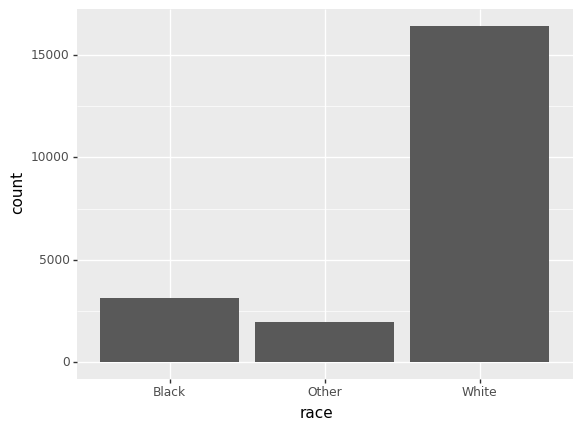

<ggplot: (155153540822)>

In [21]:
from plotnine import *
(ggplot(gss_cat) 
+ geom_bar(aes(x = 'race')))

## 15.5 修改因子水平
比修改因子水平顺序更强大的操作是修改水平的值。修改水平不仅可以使得图形标签更美观清晰，还可以将水平汇集成更高层次的显示。

我们可以使用`cat.rename_categories()`函数来修改因子水平。

In [27]:
gss_cat['partyid'].value_counts()

Independent           4119
Not str democrat      3690
Strong democrat       3490
Not str republican    3032
Ind,near dem          2499
Strong republican     2314
Ind,near rep          1791
Other party            393
No answer              154
Don't know               1
Name: partyid, dtype: int64

In [24]:
gss_cat['partyid'] = gss_cat['partyid'].cat.rename_categories({ 
    "Strong republican" : "Republican, strong",
    "Not str republican" : "Republican, weak",
    "Ind,near rep" : "Independent, near rep",
    "Ind,near dem" : "Independent, near dem",
    "Not str democrat" : "Democrat, weak",
    "Strong democrat" : "Democrat, strong"
    })
gss_cat['partyid'].value_counts()

Independent              4119
Democrat, weak           3690
Democrat, strong         3490
Republican, weak         3032
Independent, near dem    2499
Republican, strong       2314
Independent, near rep    1791
Other party               393
No answer                 154
Don't know                  1
Name: partyid, dtype: int64

`gss_cat['partyid'] = gss_cat['partyid'].cat.rename_categories({ 
    "Strong republican" : 'Republican, strong',
    "Not str republican" : "Republican, weak",
    "Ind,near rep" : "Independent, near rep",
    "Ind,near dem" : "Independent, near dem",
    "Not str democrat" : "Democrat, weak",
    "Strong democrat" : "Democrat, strong",
    "No answer" : "Other",
    "Don't know" : "Other",
    "Other party" : "Other"
    })`
    # Categorical categories must be unique